In [2]:
%%html 
<link href="https://fonts.googleapis.com/css?family=Open+Sans" rel="stylesheet">
<style>#notebook-container{font-size: 13pt;font-family:'Open Sans', sans-serif;} div.text_cell{max-width: 104ex;}</style>

In [3]:
%matplotlib notebook

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Supervised Machine Learning Algorithms

We will now review the most popular machine learning algorithms and explain how they learn from data and how they make predictions.

There are two types of _supervised machine learning_ problems.

1. Classification:
  1. Used to predict a _class label_.
  2. Choice of pre-defined possibilities
  3. _binary_ (e.g. mailspam, yes/no) vs _multi-class_ (e.g. iris dataset) classification.
2. Regression
  1. Used to predict a _continous number_ (floating-point).
  
**Characteristics**

A model will have certain characteristics:

* _Generalization_: Is the model able to _generalize_ from the training data to the test data?
* _Overfitting_: Building a model that is too complex for the amount of information. It will not be able to generalize well from the training set.
* _Underfitting_: Building a model that is too simple. It won't capture all the aspects ratios of the data. The model will not be able to score well on the training set.

**Algorithms**

Here is a quick summary of when to use each model:

1. _Nearest neighbours_; For small datasets, good as baseline, easy to explain.
2. _Linear models_; Go-to  as a first algorithm, good for very large datasets and high-dimensional data.
3. _Naive Bayes_; Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.
4. _Decision trees_; Very fast, don't need scaling of the data, can be visualized and easily explained.
5. _Random forest_; Nearly always perform better than a single decision tree, very robust and powerful. Don't need scaling of data. Not good for very high-dimensional sparse data.
6. _Gradient boost decision trees_; Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
7. _Support vector machines_; Powerful for medium-sized datasets of features with similar meaning. Requires scaling of data, sensitive to parameters.
8. _Neural networks_; Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.

## Some Sample Datasets

We will use several datasets to illustrate the different algorithms. Some of the datasets will be small and _synthetic_ (meaning made up), designed to highlight particular aspects of the algorithms. Other datasets will be large, real-world examples.

### Synthetic two-class classification dataset

An example of a synthetic two-class classification dataset is the `forge` dataset.

In [8]:
X, y = mglearn.datasets.make_forge()

<IPython.core.display.Javascript object>


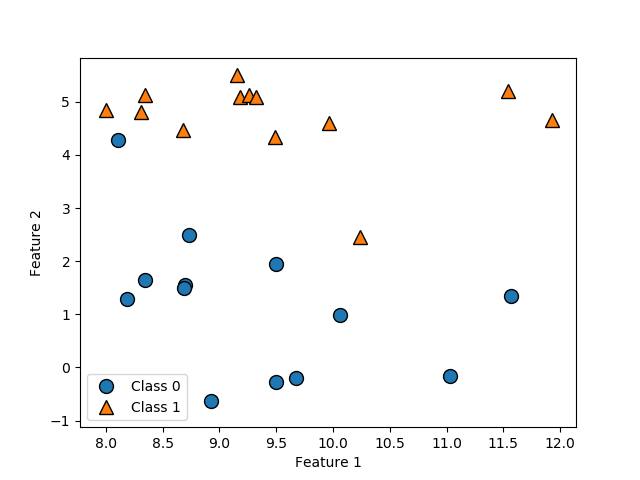

X.shape: (26, 2)


In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
print('X.shape: {}'.format(X.shape))

### Regression dataset

To illustrate regression algorithms, we will use the `wave` dataset.

<IPython.core.display.Javascript object>


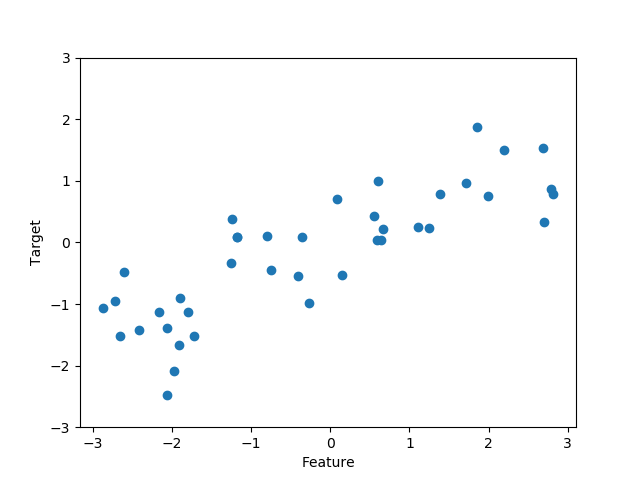

Text(0,0.5,'Target')

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')

These two simple datasets are so called _low-dimensional_ datasets because we can easily visualize them.

### Wisconsin Breast Cancer dataset

Contains records of clinical measurements of breast cancer tumors. The dataset consists of 569 data points, with 30 features each.

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): {}'.format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [20]:
print('cancer.data.shape: {}'.format(cancer.data.shape))

cancer.data.shape: (569, 30)


In [13]:
print('Sample counts per class:\n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [14]:
print('Feature names: \n{}'.format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### Boston Housing dataset

We also will be using a real-world regression dataset, the Boston Housing dataset. The task is associated with this dataset is to predict the median value of homes in several Boston neighborhoods in the 1970s.

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


Deriving more features from the dataset than there originally are is called _feature engineering_. This derived dataset can be loaded using the `load_extended_boston` function:

In [22]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)
